In [41]:
%matplotlib widget

In [42]:
import numpy as np

In [43]:
x = np.linspace(-8, 8, 200)

X, Y = np.meshgrid(x, x)





0.7513321903261694

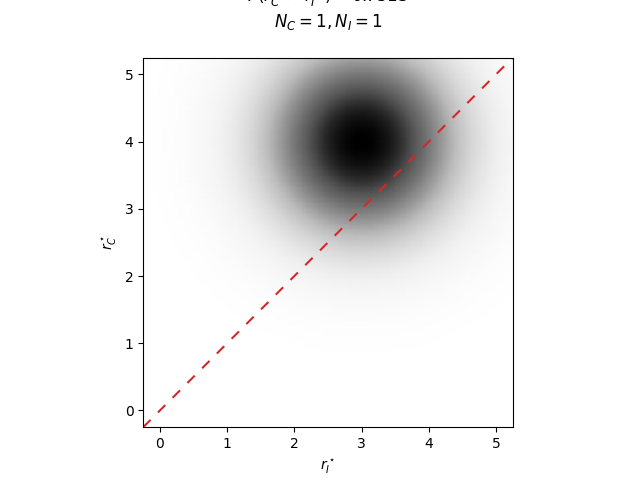

In [49]:

import matplotlib.pyplot as plt

from ipywidgets import interact
# @interact(mu_x=(0, 5, .1), mu_y=(0, 5, .1), std_x=(0, 1, .01), std_y=(0, 1, .01))
def update(mu_x=3, mu_y=4, N_x=1, N_y=1, ax=None):

    if ax is None:
        fig, ax = plt.subplots()#

    ax.set_box_aspect(1)

    mean = [mu_x, mu_y]
    std_x = 1.
    std_y = 1.
    cov = np.array([[std_x ** 2 / N_x, 0], [0, std_y ** 2 / N_y]])

    # get multivariate normal distribution from scipy
    from scipy.stats import multivariate_normal
    dist = multivariate_normal(mean, cov)

    p = dist.pdf(np.dstack([X, Y]))
    dx = x[1] - x[0]
    I = p[Y > X].sum() * dx ** 2
    ax.pcolormesh(X, Y, dist.pdf(np.dstack([X, Y])), cmap="Greys", shading="gouraud")
    ax.axline((0, 0), slope=1, color="tab:red", linestyle=(0, (5, 5)))
    ax.set_xlabel("$r^\star_I$")
    ax.set_ylabel("$r^\star_C$")
    
    title = f"""
$P(r^\star_C > r^\star_I)={I:.4f}$
$N_C={N_x}, N_I={N_y}$
"""
    ax.set_title(title)
    ax.dataLim.x0 = 0.
    ax.dataLim.y0 = 0.
    ax.dataLim.x1 = 5.
    ax.dataLim.y1 = 5.
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.set_yticks([0, 1, 2, 3, 4, 5])
    ax.autoscale_view()
    return I

update()

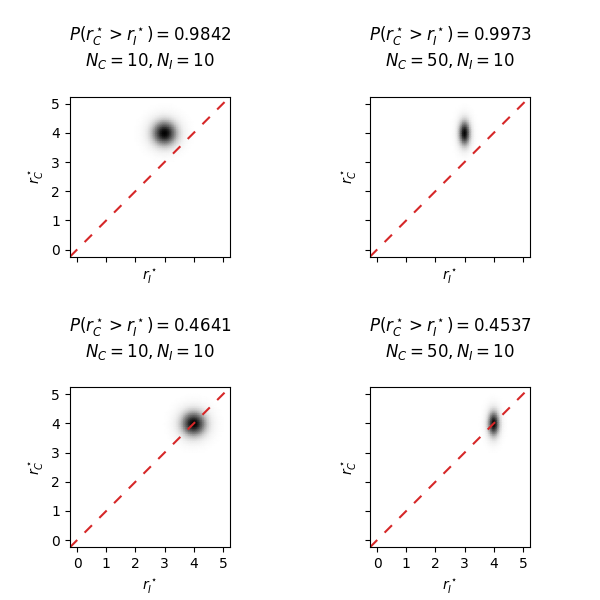

In [50]:
mu_x = [3, 4]
mu_y = 4.
N_1 = np.geomspace(10, 50, 2).astype(int)
N_2 = 10

fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True, sharey=True, layout="constrained")
for (i,j), ax in np.ndenumerate(axes):
    update(mu_x[i], mu_y, N_1[j], N_2, ax=ax)
    # ax.set_title(f"mu_x={mu_x[i]}, N_x={N_1[j]}")

In [51]:
fig.savefig("main.pdf", transparent=True)